In [1]:
pip install pandas pyarrow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import os
folder_path = "C:/Users/Rabeea/Downloads/taxi_data"


month_order = [
    'Jan 2024', 'Feb 2024', 'Mar 2024', 'Apr 2024',
    'May 2024', 'Jun 2024', 'Jul 2024', 'Aug 2024',
    'Sep 2024', 'Oct 2024', 'Nov 2024', 'Dec 2024'
]



dfs = []


for month in month_order:
    filename = f'{month}.parquet'
    file_path = os.path.join(folder_path, filename)
    
    if os.path.exists(file_path):
        df = pd.read_parquet(file_path)
        df['month'] = month  
        dfs.append(df)
    else:
        print(f"File not found: {filename}")

full_df = pd.concat(dfs, ignore_index=True)

full_df['month'] = pd.Categorical(full_df['month'], categories=month_order, ordered=True)

print(full_df['month'].unique())


['Jan 2024', 'Feb 2024', 'Mar 2024', 'Apr 2024', 'May 2024', ..., 'Aug 2024', 'Sep 2024', 'Oct 2024', 'Nov 2024', 'Dec 2024']
Length: 12
Categories (12, object): ['Jan 2024' < 'Feb 2024' < 'Mar 2024' < 'Apr 2024' ... 'Sep 2024' < 'Oct 2024' < 'Nov 2024' < 'Dec 2024']


In [3]:
import os
data_folder = r"C:/Users/Rabeea/Downloads/taxi_data"

print(os.listdir(data_folder))


['Apr 2024.parquet', 'Aug 2024.parquet', 'Dec 2024.parquet', 'Feb 2024.parquet', 'Jan 2024.parquet', 'Jul 2024.parquet', 'Jun 2024.parquet', 'Mar 2024.parquet', 'May 2024.parquet', 'Nov 2024.parquet', 'Oct 2024.parquet', 'Sep 2024.parquet']


In [4]:
full_df.describe

<bound method NDFrame.describe of           VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0                2  2024-01-01 00:57:55   2024-01-01 01:17:43   
1                1  2024-01-01 00:03:00   2024-01-01 00:09:36   
2                1  2024-01-01 00:17:06   2024-01-01 00:35:01   
3                1  2024-01-01 00:36:38   2024-01-01 00:44:56   
4                1  2024-01-01 00:46:51   2024-01-01 00:52:57   
...            ...                  ...                   ...   
41169715         2  2024-12-31 23:32:00   2024-12-31 23:56:00   
41169716         2  2024-12-31 23:05:00   2024-12-31 23:18:00   
41169717         2  2024-12-31 23:03:16   2024-12-31 23:28:35   
41169718         1  2024-12-31 23:15:33   2024-12-31 23:36:29   
41169719         2  2024-12-31 23:04:36   2024-12-31 23:33:34   

          passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                     1.0           1.72         1.0                  N   
1                     1.0          

In [5]:
full_df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,month
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0,Jan 2024
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0,Jan 2024
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0,Jan 2024
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0,Jan 2024
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0,Jan 2024


In [6]:
full_df.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'month'],
      dtype='object')

In [7]:
full_df.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count          4091232
trip_distance                  0
RatecodeID               4091232
store_and_fwd_flag       4091232
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     4091232
Airport_fee              4091232
month                          0
dtype: int64

In [8]:
missing_airport = full_df['Airport_fee'].isnull().mean() * 100
missing_congestion = full_df['congestion_surcharge'].isnull().mean() * 100

print(f"Missing Airport_fee: {missing_airport:.2f}%")
print(f"Missing Congestion Surcharge: {missing_congestion:.2f}%")


Missing Airport_fee: 9.94%
Missing Congestion Surcharge: 9.94%


In [9]:
total_rows = len(full_df)

missing_airport = full_df['Airport_fee'].isnull().sum()
missing_congestion = full_df['congestion_surcharge'].isnull().sum()

print(f"Total Rows: {total_rows}")
print(f"Missing Airport_fee: {missing_airport}")
print(f"Missing Congestion Surcharge: {missing_congestion}")


Total Rows: 41169720
Missing Airport_fee: 4091232
Missing Congestion Surcharge: 4091232


In [10]:
full_df = full_df.dropna(subset=['Airport_fee', 'congestion_surcharge'])


In [11]:
print("Remaining rows after drop:", len(full_df))


Remaining rows after drop: 37078488


In [12]:
full_df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
month                    0
dtype: int64

In [13]:
full_df['passenger_count'].isnull().sum()


0

In [14]:
len(full_df)

37078488

When are people using yellow taxis the most in NYC?

C:\Users\Rabeea\AppData\Local\Temp\ipykernel_12224\402061359.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['tpep_pickup_datetime'] = pd.to_datetime(full_df['tpep_pickup_datetime'])
C:\Users\Rabeea\AppData\Local\Temp\ipykernel_12224\402061359.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['pickup_hour'] = full_df['tpep_pickup_datetime'].dt.hour
C:\Users\Rabeea\AppData\Local\Temp\ipykernel_12224\402061359.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

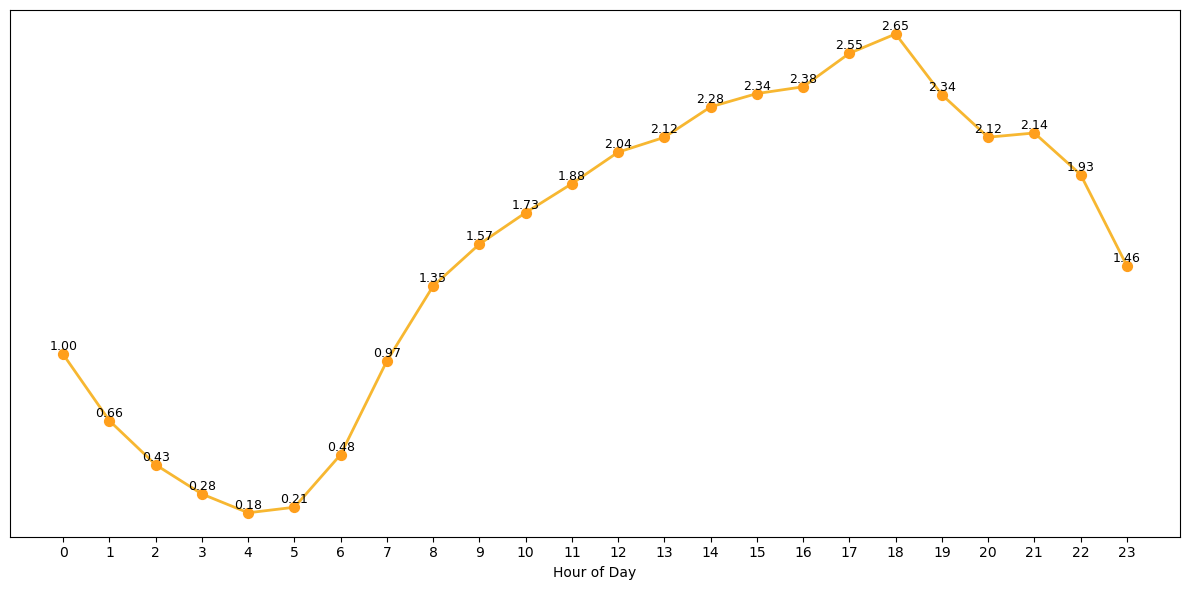

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

  Convert to datetime
full_df['tpep_pickup_datetime'] = pd.to_datetime(full_df['tpep_pickup_datetime'])

  Extract hour & day of week
full_df['pickup_hour'] = full_df['tpep_pickup_datetime'].dt.hour
full_df['pickup_dayofweek'] = full_df['tpep_pickup_datetime'].dt.day_name()

  Group: trips per hour
hourly_trips = full_df.groupby('pickup_hour').size()

  Convert to millions for cleaner display
hourly_trips_millions = hourly_trips / 1_000_000

  --- PLOT ---
plt.figure(figsize=(12, 6))

  Line
plt.plot(
    hourly_trips_millions.index,
    hourly_trips_millions.values,
    color=' f7b731',
    linewidth=2
)

  Bold dots
plt.scatter(
    hourly_trips_millions.index,
    hourly_trips_millions.values,
    color=' ff9f1c',
    s=50,          size of dots
    zorder=3
)

  Data labels above each dot
for x, y in zip(hourly_trips_millions.index, hourly_trips_millions.values):
    plt.text(
        x, y + 0.02,                    slight upward offset
        f"{y:.2f}",                     2 decimals
        ha='center',
        fontsize=9
    )

  X-axis full 0–23 hours
plt.xticks(range(24))

  Remove Y-axis (safe way)
plt.gca().axes.get_yaxis().set_visible(False)

  Remove y-axis label
plt.ylabel(None)
plt.xlabel('Hour of Day')

  Clean look
plt.grid(False)
plt.tight_layout()

plt.savefig("number_of_trips_by_hour_2024.png", dpi=300)
plt.show()


C:\Users\Rabeea\AppData\Local\Temp\ipykernel_11548\3248051026.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['tpep_pickup_datetime'] = pd.to_datetime(full_df['tpep_pickup_datetime'])
C:\Users\Rabeea\AppData\Local\Temp\ipykernel_11548\3248051026.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['pickup_hour'] = full_df['tpep_pickup_datetime'].dt.hour
C:\Users\Rabeea\AppData\Local\Temp\ipykernel_11548\3248051026.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

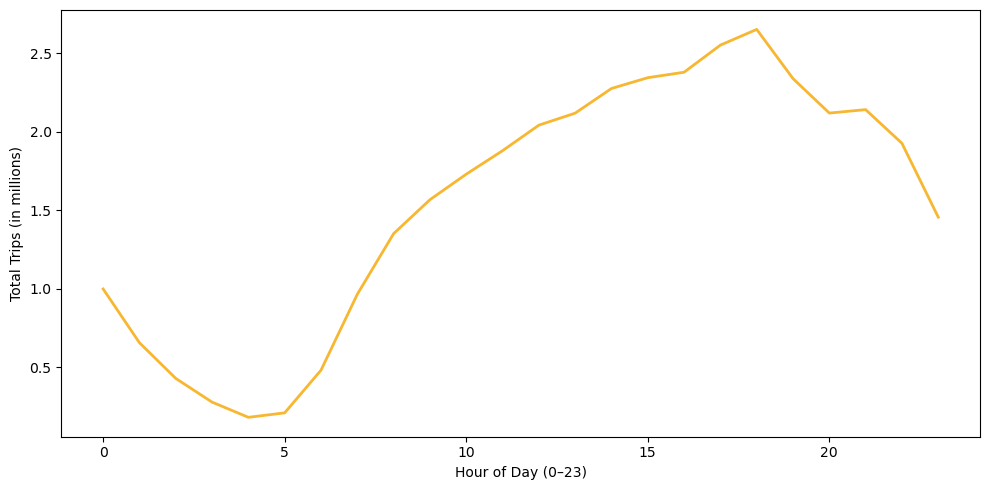

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

  Convert to datetime
full_df['tpep_pickup_datetime'] = pd.to_datetime(full_df['tpep_pickup_datetime'])

  Extract hour & day of week
full_df['pickup_hour'] = full_df['tpep_pickup_datetime'].dt.hour
full_df['pickup_dayofweek'] = full_df['tpep_pickup_datetime'].dt.day_name()

  Group: trips per hour
hourly_trips = full_df.groupby('pickup_hour').size()

  Convert to millions for cleaner y-axis (optional)
hourly_trips_millions = hourly_trips / 1_000_000

  Plot
plt.figure(figsize=(10,5))

plt.plot(
    hourly_trips_millions.index,
    hourly_trips_millions.values,
    color=' f7b731',
    linewidth=2
)

plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Total Trips (in millions)')

  Remove gridlines
plt.grid(False)

  Remove legend if any exists
plt.legend().remove()

  Tight layout
plt.tight_layout()

  Save figure
plt.savefig("number_of_trips_by_hour_2024.png", dpi=300)

plt.show()


C:\Users\Rabeea\AppData\Local\Temp\ipykernel_12224\594984433.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['tpep_pickup_datetime'] = pd.to_datetime(full_df['tpep_pickup_datetime'])
C:\Users\Rabeea\AppData\Local\Temp\ipykernel_12224\594984433.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['month'] = full_df['tpep_pickup_datetime'].dt.strftime('%b %Y')
C:\Users\Rabeea\AppData\Local\Temp\ipykernel_12224\594984433.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy o

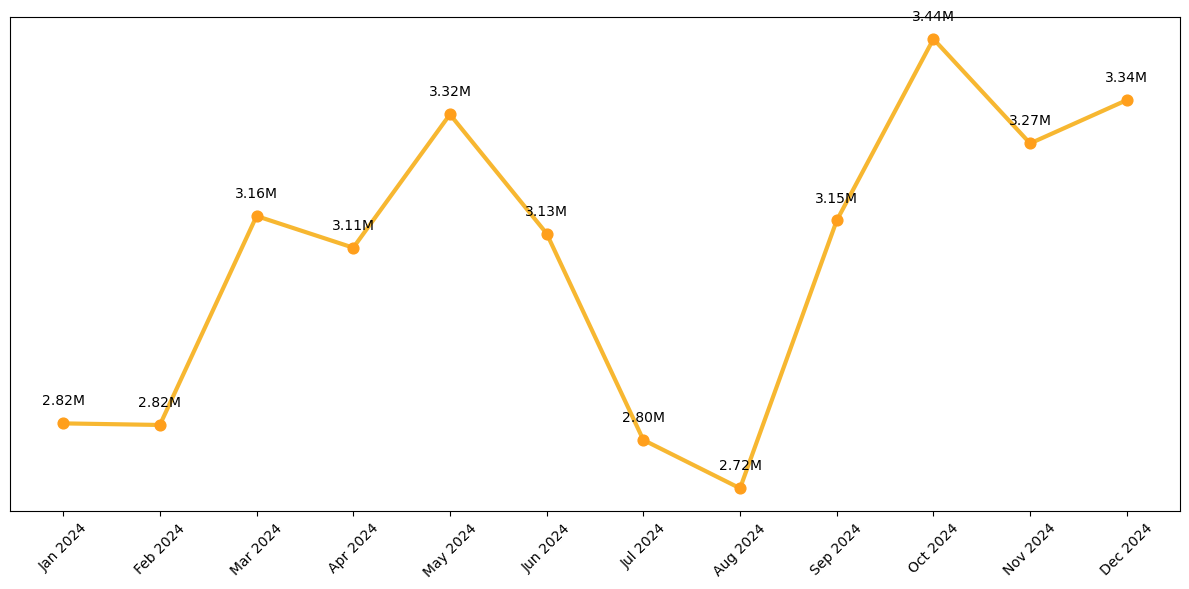

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

  Extract with month + year
full_df['tpep_pickup_datetime'] = pd.to_datetime(full_df['tpep_pickup_datetime'])
full_df['month'] = full_df['tpep_pickup_datetime'].dt.strftime('%b %Y')

  Correct month order
month_order = [
    'Jan 2024','Feb 2024','Mar 2024','Apr 2024','May 2024','Jun 2024',
    'Jul 2024','Aug 2024','Sep 2024','Oct 2024','Nov 2024','Dec 2024'
]
full_df['month'] = pd.Categorical(full_df['month'], categories=month_order, ordered=True)

  Count trips
trips_millions = full_df['month'].value_counts().sort_index() / 1_000_000

  Plot
plt.figure(figsize=(12, 6))
plt.plot(trips_millions.index, trips_millions.values, color=' f7b731', linewidth=3)

  Bold dots
plt.scatter(range(len(trips_millions)), trips_millions.values,
            color=' ff9f1c', s=60, zorder=3)

  Remove y-axis
plt.gca().axes.get_yaxis().set_visible(False)

  Month labels
plt.xticks(range(len(month_order)), month_order, rotation=45)

  Data labels
for i, v in enumerate(trips_millions.values):
    plt.text(i, v + 0.03, f"{v:.2f}M", ha='center', fontsize=10)

plt.grid(False)
plt.tight_layout()
plt.savefig("number_of_trips_by_month.png", dpi=300)
plt.show()


C:\Users\Rabeea\AppData\Local\Temp\ipykernel_12224\2927731777.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['tpep_pickup_datetime'] = pd.to_datetime(full_df['tpep_pickup_datetime'])
C:\Users\Rabeea\AppData\Local\Temp\ipykernel_12224\2927731777.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['day_of_week'] = full_df['tpep_pickup_datetime'].dt.dayofweek
C:\Users\Rabeea\AppData\Local\Temp\ipykernel_12224\2927731777.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy 

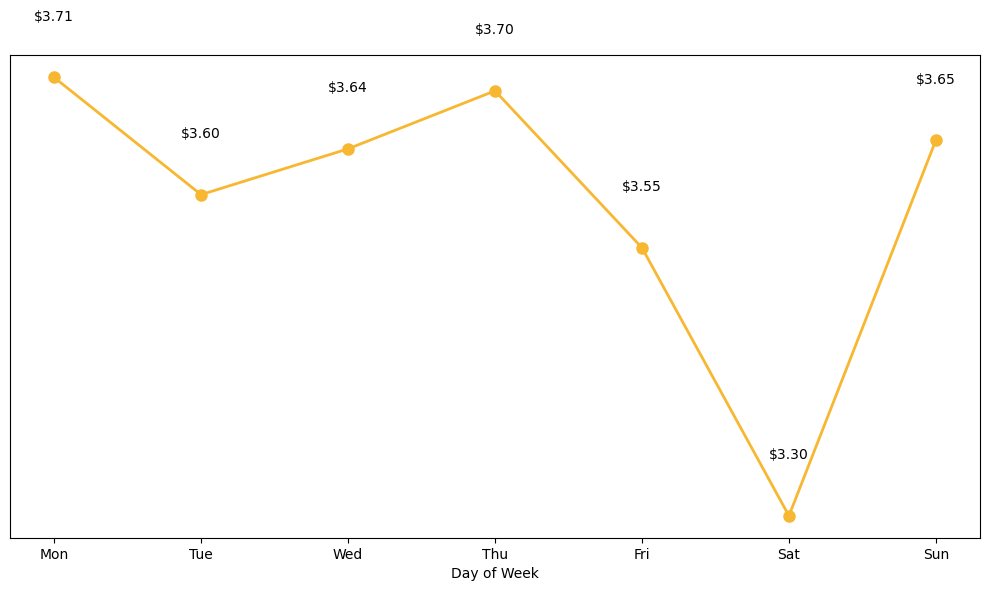

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

full_df['tpep_pickup_datetime'] = pd.to_datetime(full_df['tpep_pickup_datetime'])
full_df['day_of_week'] = full_df['tpep_pickup_datetime'].dt.dayofweek

day_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
full_df['weekday_name'] = full_df['day_of_week'].map(day_map)

avg_tip_by_day = (
    full_df.groupby('weekday_name')['tip_amount']
    .mean()
    .reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
)


plt.figure(figsize=(10, 6))

plt.plot(
    avg_tip_by_day.index,
    avg_tip_by_day.values,
    marker='o',
    markersize=8,
    linewidth=2,
    color=" f7b731",
    markeredgecolor=" f7b731"
)

plt.gca().axes.get_yaxis().set_visible(False)
plt.ylabel("")

  Add labels above dots
for i, value in enumerate(avg_tip_by_day.values):
    plt.text(
        i,
        value + 0.05,        small lift
        f"${value:.2f}",
        ha='center',
        va='bottom',
        fontsize=10,         normal, NOT bold
        color="black"
    )

plt.xlabel("Day of Week")
plt.grid(False)
plt.tight_layout()
plt.savefig("Average_tip_amount_clean.png", dpi=300)
plt.show()


C:\Users\Rabeea\AppData\Local\Temp\ipykernel_12224\173609093.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['tpep_pickup_datetime'] = pd.to_datetime(full_df['tpep_pickup_datetime'])
C:\Users\Rabeea\AppData\Local\Temp\ipykernel_12224\173609093.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['pickup_dayofweek'] = full_df['tpep_pickup_datetime'].dt.day_name()


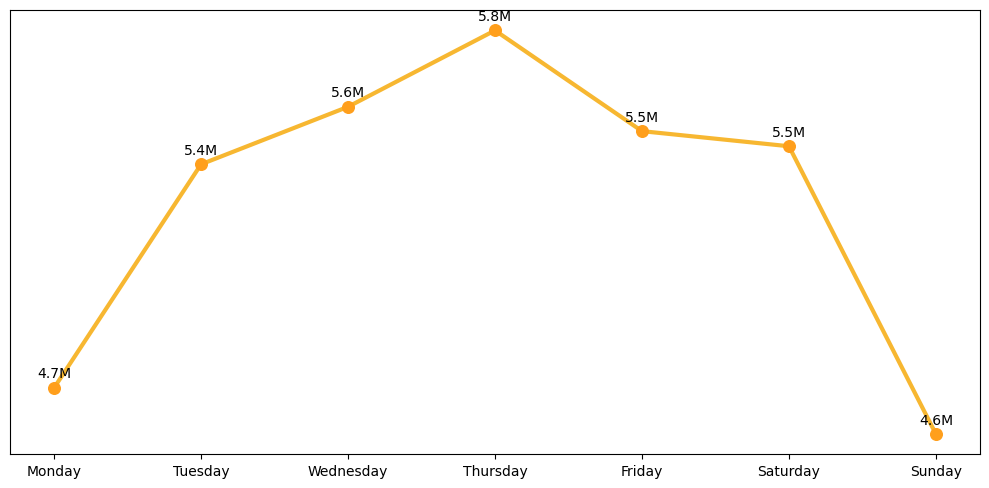

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

  Convert to datetime
full_df['tpep_pickup_datetime'] = pd.to_datetime(full_df['tpep_pickup_datetime'])

  Create day-of-week column
full_df['pickup_dayofweek'] = full_df['tpep_pickup_datetime'].dt.day_name()

  Define daily_trips (ordered Monday → Sunday)
ordered_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

daily_trips = (
    full_df.groupby('pickup_dayofweek').size()
    .reindex(ordered_days)
)

  Convert to millions
daily_trips_millions = daily_trips / 1_000_000

  Plot line chart
plt.figure(figsize=(10, 5))

  Line
plt.plot(
    daily_trips_millions.index,
    daily_trips_millions.values,
    color=' f7b731',
    linewidth=3
)

  Bold dots
plt.scatter(
    range(len(daily_trips_millions)),
    daily_trips_millions.values,
    color=' ff9f1c',
    s=70,
    zorder=3
)

  Remove y-axis entirely
plt.gca().axes.get_yaxis().set_visible(False)

  X-axis: normal labels
plt.xticks(range(len(ordered_days)), ordered_days)

  Labels on each point (e.g., "4.8M")
for i, value in enumerate(daily_trips_millions.values):
    plt.text(
        i,
        value + 0.03,
        f"{value:.1f}M",
        ha='center',
        fontsize=10,
    )

  No grid, no frame clutter
plt.grid(False)

  Tight layout
plt.tight_layout()

  Save high-res
plt.savefig("number_of_trips_by_day_2024.png", dpi=300)

plt.show()


In [17]:
import os
os.listdir()



['.ipynb_checkpoints',
 'APIs.ipynb',
 'Average_tip_amount.png',
 'cash_vs_card_by_borough_FINAL.png',
 'cash_vs_card_by_borough_FINAL_WORKING.png',
 'CASH_VS_CARD_BY_BOROUGH_PERFECT_FINAL.png',
 'desktop.ini',
 'dropoff_zone_counts.csv',
 'FINAL_PRESENTATION_TOP_VENDORS.html',
 'geotracker.csv',
 'ground_dictionary.csv',
 'How many signed sellers sell.png',
 'How_many_signed_sellers.png',
 'How_many_signed_sellers_sell.png',
 'LAST_CHANCE_MAP.html',
 'number_of_trips_by_day_2024.png',
 'number_of_trips_by_hour_2024.png',
 'number_of_trips_by_month_2024.png',
 'NYC.ipynb',
 'nyc_final.ipynb',
 'nyc_pickups_map.html',
 'nyc_quarterly.ipynb',
 'NYC_TOP_VENDOR_MAP.html',
 'Olist_analysis.ipynb',
 'payment_by_borough_presentation.png',
 'payment_by_borough_stacked.png',
 'pickup_dropoff_combined_map.html',
 'pickup_locations_final_map.html',
 'pickup_locations_final_map_FIXED.html',
 'pickup_locations_map.html',
 'pickup_map_ACTUALLY_WORKING.html',
 'pickup_zone_counts.csv',
 'project_cont

In [18]:
full_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 37078488 entries, 0 to 40843428
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            fl

In [19]:
full_df.passenger_count.value_counts()


passenger_count
1.0    28632703
2.0     5410774
3.0     1282073
4.0      814889
0.0      401354
5.0      320613
6.0      215798
8.0         192
7.0          56
9.0          36
Name: count, dtype: int64

In [20]:
negative_fares = full_df[full_df['fare_amount'] < 0]
print(f"Number of trips with negative fare amount: {len(negative_fares)}")

negative_fares[['fare_amount', 'trip_distance', 'payment_type', 'tpep_pickup_datetime', 'VendorID']].head(10)


Number of trips with negative fare amount: 603932


,fare_amount,trip_distance,payment_type,tpep_pickup_datetime,VendorID
99,-13.5,2.16,4,2024-01-01 00:18:24,2
506,-31.5,0.01,2,2024-01-01 00:04:00,2
536,-5.8,0.47,4,2024-01-01 00:41:42,2
552,-33.1,5.48,2,2024-01-01 00:42:02,2
682,-47.8,8.74,4,2024-01-01 00:24:02,2
999,-9.3,1.17,4,2024-01-01 00:14:22,2
1057,-11.4,1.57,4,2024-01-01 00:45:56,2
1195,-40.1,9.60,4,2024-01-01 00:30:18,2
1382,-3.0,0.00,4,2024-01-01 00:33:28,2
1472,-11.4,1.58,4,2024-01-01 00:30:10,2


In [21]:
negative_fares['payment_type'].value_counts()


payment_type
4    368654
2    144430
3     90609
1       239
Name: count, dtype: int64

In [22]:
negative_fares['VendorID'].value_counts()


VendorID
2    603932
Name: count, dtype: int64

In [23]:
full_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'month',
       'pickup_hour', 'pickup_dayofweek'],
      dtype='object')

In [28]:
dispute_count = full_df[full_df["payment_type"] == 4].shape[0]
dispute_count


794494

C:\Users\Rabeea\AppData\Local\Temp\ipykernel_11548\2300057069.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['tpep_pickup_datetime'] = pd.to_datetime(full_df['tpep_pickup_datetime'])
C:\Users\Rabeea\AppData\Local\Temp\ipykernel_11548\2300057069.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['day_of_week'] = full_df['tpep_pickup_datetime'].dt.dayofweek
C:\Users\Rabeea\AppData\Local\Temp\ipykernel_11548\2300057069.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy 

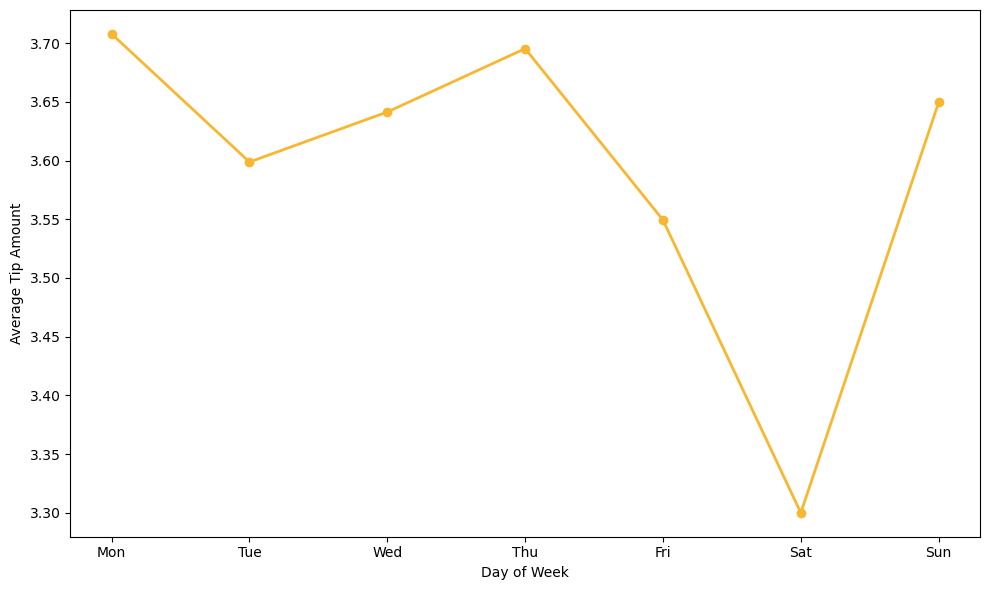

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

  Ensure the timestamp is datetime type
full_df['tpep_pickup_datetime'] = pd.to_datetime(full_df['tpep_pickup_datetime'])

  Extract day of week (0 = Mon, 6 = Sun)
full_df['day_of_week'] = full_df['tpep_pickup_datetime'].dt.dayofweek

  Map day numbers to names
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
full_df['weekday_name'] = full_df['day_of_week'].map(day_map)

  Compute average tip per day and ensure correct order
avg_tip_by_day = (
    full_df.groupby('weekday_name')['tip_amount']
    .mean()
    .reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
)

  Plot as LINE chart
plt.figure(figsize=(10, 6))
plt.plot(avg_tip_by_day.index, avg_tip_by_day.values, marker='o', linewidth=2,color=" f7b731")
plt.xlabel("Day of Week")
plt.ylabel("Average Tip Amount")
plt.grid(False)
plt.tight_layout()
plt.savefig("Average_tip_amount.png", dpi=300)
plt.show()


In [25]:
!pip install polars

In [26]:
import polars as pl

  Lazy scan over all 2024 parquet files
lazy_df = pl.scan_parquet(r"C:\Users\Rabeea\Downloads\taxi_data")

result = (
    lazy_df
    .filter(pl.col("fare_amount") > 0)     avoid division by zero
    .with_columns(
        (pl.col("tip_amount") / pl.col("fare_amount")).alias("tip_rate")
    )
    .group_by("payment_type")              <-- FIXED METHOD NAME
    .agg(pl.mean("tip_rate").alias("avg_tip_rate"))
    .collect()                             Only returns ~6 rows!
)

print(result)



shape: (6, 2)
┌──────────────┬──────────────┐
│ payment_type ┆ avg_tip_rate │
│ ---          ┆ ---          │
│ i64          ┆ f64          │
╞══════════════╪══════════════╡
│ 1            ┆ 0.261926     │
│ 2            ┆ 0.000015     │
│ 0            ┆ 0.035586     │
│ 5            ┆ 0.0          │
│ 4            ┆ 0.000858     │
│ 3            ┆ 0.001102     │
└──────────────┴──────────────┘


In [27]:
import polars as pl

lazy_df = pl.scan_parquet(r"C:\Users\Rabeea\Downloads\taxi_data")

result = (
    lazy_df
    .filter(pl.col("fare_amount") > 0)
    .with_columns((pl.col("tip_amount") / pl.col("fare_amount")).alias("tip_rate"))
    .group_by("payment_type")
    .agg(pl.mean("tip_rate").alias("avg_tip_rate"))
    .collect()
)


In [28]:
import pandas as pd

pdf = result.to_pandas()

payment_map = {
    0: 'Flex Fare',
    1: 'Card',
    2: 'Cash'
}

pdf['payment_name'] = pdf['payment_type'].map(payment_map)

pdf = pdf[pdf['payment_name'].notna()].copy()
pdf['avg_tip_pct'] = pdf['avg_tip_rate'] * 100


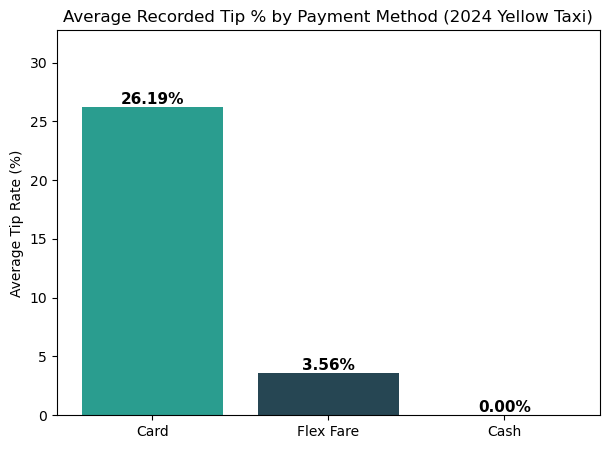

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
bars = plt.bar(pdf['payment_name'], pdf['avg_tip_pct'], color=[' 2a9d8f',' 264653',' e76f51'])

for bar, value in zip(bars, pdf['avg_tip_pct']):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        value + 0.3,
        f"{value:.2f}%",
        ha='center',
        fontsize=11,
        fontweight='bold'
    )

plt.ylabel("Average Tip Rate (%)")
plt.title("Average Recorded Tip % by Payment Method (2024 Yellow Taxi)")
plt.ylim(0, pdf['avg_tip_pct'].max() * 1.25)
plt.show()


In [30]:
total_money = (
    lazy_df
    .select((pl.col("fare_amount") + pl.col("tip_amount")).sum().alias("total_revenue"))
    .collect()
)

  Extract the numeric value
total_money_value = total_money["total_revenue"][0]

print(f"${total_money_value/1_000_000:,.1f} Million")




$929.5 Million


In [31]:
def pretty(n):
    if isinstance(n, (list, tuple)): n = n[0]     if wrapped
    if n > 1_000_000_000:
        return f"{n/1_000_000_000:,.2f} Billion"
    if n > 1_000_000:
        return f"{n/1_000_000:,.2f} Million"
    if n > 1_000:
        return f"{n:,.0f}"
    return f"{n}"


In [32]:
trips = lazy_df.select(pl.len().alias("n")).collect()["n"][0]
print("🚕 Total Trips:", pretty(trips))


🚕 Total Trips: 41.17 Million


In [33]:
rev = (
    lazy_df
    .select((pl.col("fare_amount") + pl.col("tip_amount")).sum())
    .collect()[0,0]
)
print("💰 Total Revenue:", "$" + pretty(rev))


💰 Total Revenue: $929.46 Million


In [34]:
import polars as pl
import glob

  Path to your folder
folder_path = r"C:\Users\Rabeea\Downloads\taxi_data\*.parquet"

  Get list of all parquet files
files = glob.glob(folder_path)



In [35]:
lazy_frames = []

for file in files:
    lf = (
        pl.scan_parquet(file)
        .with_columns([
            pl.col("tpep_pickup_datetime").cast(pl.Datetime("ns")),
            pl.col("tpep_dropoff_datetime").cast(pl.Datetime("ns"))
        ])
    )
    lazy_frames.append(lf)


In [36]:
lazy_df = pl.concat(lazy_frames, how="vertical")


In [37]:
  Check combined schema
print(lazy_df.schema)

  Run a test KPI
avg_duration = (
    lazy_df
    .select(
        (pl.col("tpep_dropoff_datetime") - pl.col("tpep_pickup_datetime"))
        .dt.total_seconds() / 60
    )
    .mean()
    .collect()
)

print(f"⏱ Avg Trip Duration: {avg_duration.item():.2f} minutes")


Schema({'VendorID': Int32, 'tpep_pickup_datetime': Datetime(time_unit='ns', time_zone=None), 'tpep_dropoff_datetime': Datetime(time_unit='ns', time_zone=None), 'passenger_count': Int64, 'trip_distance': Float64, 'RatecodeID': Int64, 'store_and_fwd_flag': String, 'PULocationID': Int32, 'DOLocationID': Int32, 'payment_type': Int64, 'fare_amount': Float64, 'extra': Float64, 'mta_tax': Float64, 'tip_amount': Float64, 'tolls_amount': Float64, 'improvement_surcharge': Float64, 'total_amount': Float64, 'congestion_surcharge': Float64, 'Airport_fee': Float64})


C:\Users\Rabeea\AppData\Local\Temp\ipykernel_11548\2523019863.py:2: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  print(lazy_df.schema)


⏱ Avg Trip Duration: 17.47 minutes


In [38]:
import polars as pl

  1️⃣ Total number of trips
total_trips = lazy_df.select(pl.count()).collect()[0, 0]
print(f"🚕 Total Trips: {total_trips:,}")

  2️⃣ Total revenue (fare + tip)
total_revenue = (
    lazy_df
    .select((pl.col("fare_amount") + pl.col("tip_amount")).sum())
    .collect()[0, 0]
)
print(f"💰 Total Revenue: ${total_revenue/1_000_000:,.2f} Million")

  3️⃣ Average revenue per trip
avg_rev_per_trip = total_revenue / total_trips
print(f"💵 Avg Revenue per Trip: ${avg_rev_per_trip:.2f}")

  4️⃣ Airport trips and share
airport_trips = (
    lazy_df
    .filter(pl.col("Airport_fee") > 0)
    .select(pl.count())
    .collect()[0, 0]
)
print(f"✈ Airport Trips: {airport_trips:,} ({airport_trips/total_trips:.1%})")

  5️⃣ Average fare per mile
avg_fare_per_mile = (
    lazy_df
    .filter(pl.col("trip_distance") > 0)
    .select((pl.col("fare_amount") / pl.col("trip_distance")).mean())
    .collect()[0, 0]
)
print(f"📏 Avg Fare per Mile: ${avg_fare_per_mile:.2f}")

  6️⃣ Average trip duration (minutes)
avg_minutes = (
    lazy_df
    .select(
        (pl.col("tpep_dropoff_datetime") - pl.col("tpep_pickup_datetime"))
        .dt.total_seconds()
        / 60
    )
    .mean()
    .collect()[0, 0]
)
print(f"⏱ Avg Trip Duration: {avg_minutes:.2f} minutes")



🚕 Total Trips: 41,169,720


C:\Users\Rabeea\AppData\Local\Temp\ipykernel_11548\2932523936.py:4: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  total_trips = lazy_df.select(pl.count()).collect()[0, 0]


💰 Total Revenue: $929.46 Million
💵 Avg Revenue per Trip: $22.58


C:\Users\Rabeea\AppData\Local\Temp\ipykernel_11548\2932523936.py:23: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .select(pl.count())


✈ Airport Trips: 3,213,980 (7.8%)
📏 Avg Fare per Mile: $12.38
⏱ Avg Trip Duration: 17.47 minutes
